d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabt

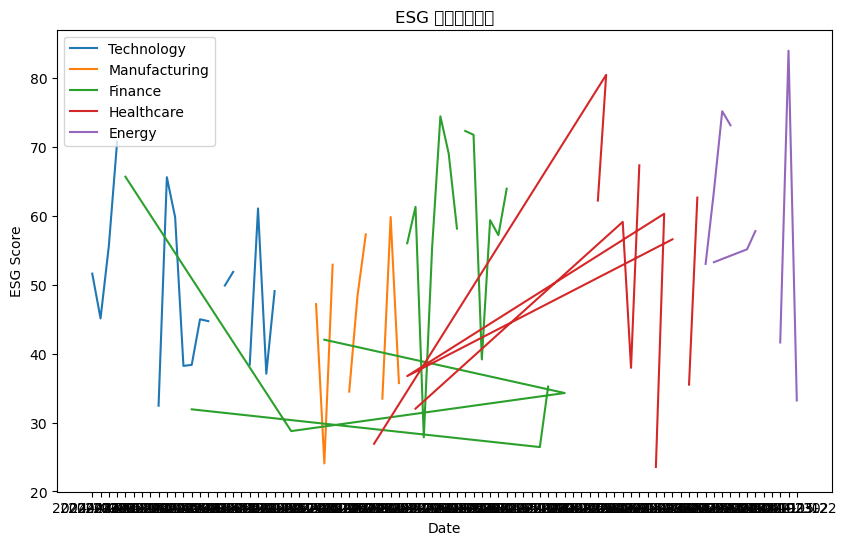

               carbon_footprint  labor_practices  board_diversity
industry                                                         
Energy                61.260085        53.314043        50.741834
Finance               44.003778        52.727876        59.630412
Healthcare            45.248779        49.017142        55.018472
Manufacturing         48.176509        52.795985        45.746742
Technology            44.306477        60.757562        41.613202


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from jinja2 import Environment, FileSystemLoader
import matplotlib.pyplot as plt
import plotly.express as px

# 加载数据集
data = pd.read_csv("esg_data.csv")

# 1. 创建 ESG 评分系统
def calculate_esg_score(row, weights):
    """计算 ESG 分数，基于不同指标和权重"""
    esg_score = (
        row['carbon_footprint'] * weights['carbon_footprint'] +
        row['labor_practices'] * weights['labor_practices'] +
        row['board_diversity'] * weights['board_diversity']
    )
    return esg_score

weights = {
    'carbon_footprint': 0.4,
    'labor_practices': 0.3,
    'board_diversity': 0.3
}
data['esg_score'] = data.apply(calculate_esg_score, axis=1, weights=weights)

# 2. 建立行业基准
industry_benchmark = data.groupby('industry')[['esg_score']].mean().reset_index()
industry_benchmark.columns = ['industry', 'avg_esg_score']

# 3. 处理缺失数据
def handle_missing_data(df):
    """采用均值插补和回归预测方法填补缺失值"""
    # 均值插补数值列
    imputer = SimpleImputer(strategy='mean')
    df[['carbon_footprint', 'labor_practices', 'board_diversity']] = imputer.fit_transform(
        df[['carbon_footprint', 'labor_practices', 'board_diversity']]
    )
    return df

data = handle_missing_data(data)

# 4. 分析趋势和模式
def analyze_trends(data):
    """绘制 ESG 分数时间变化趋势"""
    plt.figure(figsize=(10, 6))
    for industry in data['industry'].unique():
        subset = data[data['industry'] == industry]
        plt.plot(subset['date'], subset['esg_score'], label=industry)
    plt.legend()
    plt.title("ESG 分数时间变化")
    plt.xlabel("Date")
    plt.ylabel("ESG Score")
    plt.show()

def common_patterns(data):
    """分析 ESG 分数中的常见优缺点"""
    avg_scores = data.groupby('industry')[['carbon_footprint', 'labor_practices', 'board_diversity']].mean()
    print(avg_scores)

analyze_trends(data)
common_patterns(data)

# 5. 生成报告
def generate_report(data, template_file, output_file):
    """生成 ESG 报告，基于 Jinja2 模板"""
    env = Environment(loader=FileSystemLoader('.'))
    template = env.get_template(template_file)
    # 渲染模板
    html_out = template.render(
        company_name="示例公司",
        report_upload_date="2024-11-08",
        analysis_date="2024-11-08",
        company_profile="公司概述信息",
        model_overview="模型概述信息",
        esg_background="公司ESG发展历史",
        industry_benchmarks=industry_benchmark.to_dict(orient='records'),
        environmental_score=80,  # 替换为计算的分数
        social_score=85,
        governance_score=90,
        industry_comparison="行业比较信息",
        achievements_outlook="公司成就与未来目标",
        investor_summary="面向投资者的摘要",
        regulator_summary="面向监管机构的摘要",
        management_summary="面向管理层的摘要"
    )
    
    # 输出 HTML 文件
    with open(output_file, 'w') as f:
        f.write(html_out)

generate_report(data, 'investor_report_template.html', 'investor_report.html')
